In [31]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt


Results of experiment

In [71]:
clicks_A = 1135
orders_A = 5
clicks_B = 1149
orders_B = 17

Observed converstion rates

In [72]:
orders_A*100/clicks_A

0.44052863436123346

In [73]:
orders_B*100/clicks_B

1.4795474325500435

Simulated data

In [74]:
data_A = np.r_[[0] * (clicks_A - orders_A), [1] * orders_A]
data_B = np.r_[[0] * (clicks_B - orders_B), [1] * orders_B]

In [75]:
data_B

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
np.mean(data_B)

0.014795474325500435

In [77]:
np.mean(data_A)

0.004405286343612335

In [78]:
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_B - p_A)

    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=data_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=data_B)

    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_A]
>Metropolis: [p_B]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 31 seconds.


In [79]:
p_A_samples = trace["p_A"]
p_B_samples = trace["p_B"]
delta_samples = trace["delta"]

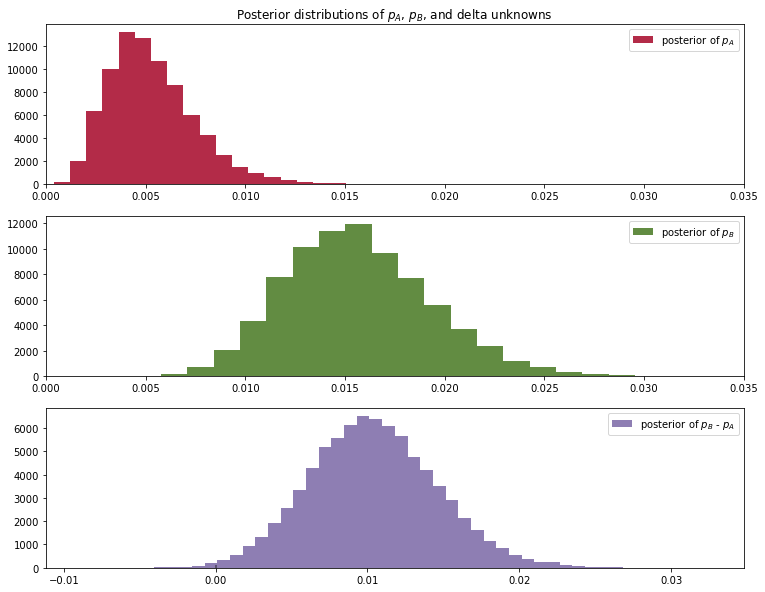

In [80]:
ax = plt.subplot(311)

plt.xlim(0, .035)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", edgecolor= "none")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .035)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
        label="posterior of $p_B$", color="#467821", edgecolor = "none")
plt.legend(loc="upper right")

ax = plt.subplot(313)
# plt.ylim(0,300)
plt.hist(delta_samples, histtype='stepfilled', bins=50, alpha=0.85,
        label="posterior of $p_B$ - $p_A$", color="#7A68A6", edgecolor = "none")
plt.legend(loc="upper right")
plt.vlines(0, 0, 120, color="black", alpha = .5)

plt.show()

In [81]:
print("Probability site A is BETTER than site B: %.3f" % (delta_samples < 0).mean())
print("Probability site A is WORSE than site B: %.3f" % (delta_samples > 0).mean())

Probability site A is BETTER than site B: 0.005
Probability site A is WORSE than site B: 0.995
